In [273]:
!pip install ydata_profiling;  kagglehub

# EDA part

In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
from ydata_profiling import ProfileReport
import kagglehub
import os
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
# Download latest version

folder = kagglehub.dataset_download("khanghunhnguyntrng/football-players-transfer-fee-prediction-dataset")

In [4]:
# list the files in the folder
file =  os.listdir(folder)

In [5]:
# create dataframe
df = pd.read_csv(f"{folder}/{file[0]}")

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [6]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

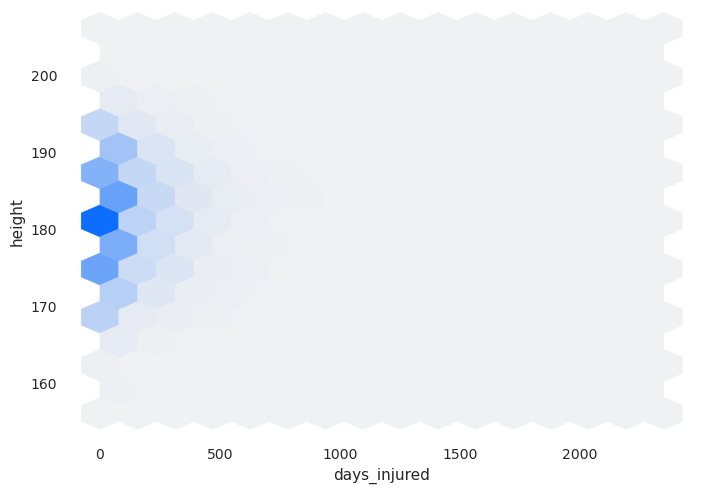

In [346]:
# Generate a profile report using ydata_profiling
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# Display the report
profile.to_notebook_iframe()

In [7]:
# show columns
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

In [8]:
# quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [9]:
# the data source is from transfermarket, therefore its trustworthy

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [10]:
# the data is updated since 2023

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [11]:
# only one dataset is used, consistency is not applied

#### 4. Relevance: 


In [12]:
# primarly, the unnecessary column is player link

In [13]:
# drop player column and name of player
df.drop('name', axis=1, inplace=True)
df.drop('player', axis=1, inplace=True)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [14]:
df.duplicated().sum()

0

In [15]:
# No duplicates

#### 6. Completeness: 

In [16]:
#Display number missing values per column
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [17]:
# No missing values

#### 7. Check Accuracy:

In [18]:
# check columns types 
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [19]:
# find the short names to find if it an empty character such as "-" "/" etc.
df['name'].str.len().min()

KeyError: 'name'

In [360]:
# Find text entries smaller than 2 characters
short_names = df[df['name'].apply(lambda x: len(x) <= 2)]
short_names

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3904,CD Santa Clara,MT,midfield-AttackingMidfield,185.0,22.0,23,0.000000,0.000000,0.260681,0.000000,...,0.0,0.0,1381,21,2,0,450000,450000,3,0
4192,GD Chaves,Jô,Attack Centre-Forward,192.0,28.0,56,0.311179,0.034575,0.380330,0.034575,...,0.0,0.0,2603,0,0,0,300000,375000,4,0


In [361]:
# we decided to keep the short names

In [362]:
df['team'].unique()

array(['Manchester United', 'West Ham United', 'Leicester City',
       'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
       'Brighton &amp; Hove Albion', 'Everton FC', 'Nottingham Forest',
       'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
       'Brentford FC', 'Liverpool FC', 'Newcastle United',
       'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
       'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
       'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
       'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF',
       'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
       'Rayo Vallecano', 'RCD Mallorca', 'UD Almería',

In [363]:
df['position'].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [364]:
minimum_values =df['highest_value'].min()
minimum_values

0

In [365]:
df[df['highest_value']== minimum_values]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
406,Newcastle United,Sven Botman,Defender Centre-Back,195.000000,23.000000,76,0.041159,0.013720,0.123476,0.0,...,0.0,0.0,6560,118,19,4,0,0,2,0
407,Newcastle United,Fabian Schär,Defender Centre-Back,186.000000,31.000000,67,0.045678,0.076129,0.182710,0.0,...,0.0,0.0,5911,285,30,3,0,0,2,0
408,Newcastle United,Jamaal Lascelles,Defender Centre-Back,188.000000,29.000000,38,0.068992,0.000000,0.310464,0.0,...,0.0,0.0,2609,418,57,2,0,0,2,0
409,Newcastle United,Matt Targett,Defender Left-Back,183.000000,27.000000,54,0.023747,0.023747,0.094987,0.0,...,0.0,0.0,3790,380,66,0,0,0,2,1
666,FC Augsburg,Mert Kömür,midfield-AttackingMidfield,183.000000,17.000000,46,0.268876,0.293319,0.073330,0.0,...,0.0,0.0,3682,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,Brisbane Roar,Zahi Addis,Defender Left-Back,181.240353,19.000000,0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,2,1
10586,Brisbane Roar,James Murphy,midfield,181.240353,17.000000,0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,3,0
10587,Brisbane Roar,Riley Gill,midfield,181.240353,26.041903,0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0,0,0,0,0,0,3,0
10686,Sydney FC,Corey Hollman,midfield-DefensiveMidfield,181.240353,19.000000,1,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,3,0,0,0,0,0,3,0


In [366]:
# drop the players that has no value, they are 125 playes
df = df.drop(df[df['highest_value']== minimum_values].index, axis=0)

In [367]:
# show the least appearances players
minimum_appearances = df['appearance'].min()
minimum_appearances

0

In [368]:
df[df['appearance']==minimum_appearances]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
189,Everton FC,Andy Lonergan,Goalkeeper,193.000000,39.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,255,32,3,200000,700000,1,0
322,AFC Bournemouth,Darren Randolph,Goalkeeper,187.000000,36.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,103,18,1,500000,4500000,1,0
349,Brentford FC,Matthew Cox,Goalkeeper,183.000000,20.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,500000,500000,1,0
565,VfL Wolfsburg,Niklas Klinger,Goalkeeper,187.000000,27.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,132,24,3,100000,100000,1,0
620,1.FC Union Berlin,Jakob Busk,Goalkeeper,189.000000,29.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,134,22,2,250000,800000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10650,Melbourne City FC,James Nieuwenhuizen,Goalkeeper,181.240353,19.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,25000,25000,1,0
10660,Melbourne City FC,Emile Peios,midfield,181.240353,19.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,25000,25000,3,0
10663,Melbourne City FC,Emin Durakovic,midfield-LeftMidfield,181.240353,17.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,25000,25000,3,1
10673,Melbourne City FC,Arion Sulemani,Attack Centre-Forward,181.240353,18.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,101,12,0,25000,25000,4,0


In [369]:
# drop players that has no appearances, they are 389 playes
df = df.drop(df[df['appearance']== minimum_appearances].index, axis=0)

In [370]:
# find players with minimum minutes played

minimum_minutes =df['minutes played'].min()
minimum_minutes

0

In [371]:
df[df['minutes played']== minimum_minutes]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3041,SC Heerenveen,Jan Bekkema,Goalkeeper,186.000000,27.0,1,0.0,0.0,0.0,0.0,...,0.0,1.0,0,0,0,3,50000,75000,1,0
3229,Santos FC,Ed Carlos,midfield-CentralMidfield,186.000000,22.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,500000,500000,3,0
3325,Sport Club Internacional,Lucas Ramos,midfield-DefensiveMidfield,173.000000,22.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,1100000,1100000,3,0
3743,CR Flamengo,Rodrigo Caio,Defender Centre-Back,183.000000,29.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,507,91,10,2000000,9000000,2,0
5591,Middlesbrough FC,Darnell Fisher,Defender Right-Back,175.000000,29.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,109,14,2,300000,800000,2,1
7580,Club Atlético Lanús,Maximiliano González,midfield-DefensiveMidfield,179.000000,19.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,1200000,1200000,3,0
7811,Club Atlético Tucumán,Kevin Isa Luna,Attack-LeftWinger,180.000000,22.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,225000,350000,4,1
8906,Gamba Osaka,Ko Yanagisawa,Defender Right-Back,178.000000,26.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,80,12,0,300000,350000,2,1
9171,Abha Club,Tariq Al-Shahrani,midfield-DefensiveMidfield,175.000000,23.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,25000,3,0
9263,Al-Batin FC,Jathob Muslet,midfield,181.240353,16.0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,25000,25000,3,0


In [372]:
# drop them
df = df.drop(df[df['minutes played']== minimum_minutes].index, axis=0)

In [373]:
# show the minimum current value
minimum_current_value = df['current_value'].min()
minimum_current_value

0

In [374]:
# drop them
df = df.drop(df[df['current_value']== minimum_current_value].index, axis=0)

In [375]:
df.shape

(10219, 21)

In [20]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

In [21]:
# detect outliers using zscore
# first select numeric columns
numric_df = df.select_dtypes(include=['number'])
zscores = numric_df.apply(zscore)

In [22]:
# show zscore
abs(zscores)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,1.113373e+00,1.247140,2.548245,0.532971,0.606773,0.416711,0.184919,0.084128,2.454353,0.314349,3.422625,0.433575,0.463008,2.948703,1.250912,4.768555,1.737002,0.666387
1,2.117750e+00,0.828503,0.807041,0.532971,0.606773,0.279250,0.184919,0.084128,2.511052,0.175438,0.577159,2.237678,1.803642,0.256629,0.233422,1.183591,1.737002,0.666387
2,9.698906e-01,2.293733,1.221739,0.532971,0.606773,0.438879,0.184919,0.084128,1.096013,0.951733,1.077750,3.305038,2.915584,0.544704,0.332378,0.011398,1.737002,0.666387
3,8.953810e-01,0.218090,1.718849,0.413731,0.214852,0.080861,0.184919,0.084128,0.297651,0.048552,1.947563,0.325564,0.264031,1.880259,5.099186,3.274820,0.723122,0.666387
4,1.400338e+00,0.828503,1.002552,0.457033,0.481975,0.314755,0.184919,0.084128,0.297651,0.048552,1.266422,0.685155,1.504273,5.085590,3.999679,5.515423,0.723122,0.666387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,2.527020e-09,1.264683,0.769341,0.213940,0.006968,0.171549,0.184919,0.084128,0.297651,0.048552,0.716157,0.673302,0.676843,0.523740,0.390102,0.453917,1.304637,1.500630
10750,1.256856e+00,0.427408,0.392343,1.048996,0.693139,0.007914,0.184919,0.084128,0.297651,0.048552,0.505434,0.091106,0.092963,0.523740,0.365363,0.437112,1.304637,0.666387
10751,2.527020e-09,1.474001,0.618542,1.058884,0.606773,0.005221,0.184919,0.084128,0.297651,0.048552,0.747320,0.673302,0.676843,0.523740,0.392851,0.455784,1.304637,0.666387
10752,2.527020e-09,1.264683,0.731641,0.792041,0.119074,0.438879,0.184919,1.198195,0.297651,0.048552,0.794312,0.673302,0.676843,0.523740,0.392851,0.455784,1.304637,0.666387


In [23]:
# set a threshold for zscore

threshold = 3 # common value
outliers = df[(abs(zscores) > threshold).any(axis=1)]

# show outlers calculated by zscore
outliers

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0000,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
2,Manchester United,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0000,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,Manchester United,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
5,Manchester United,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10700,Adelaide United,Goalkeeper,187.0,18.0,3,0.000000,0.000000,0.000000,0.0000,0.0,1.706161,0.426540,211,0,0,0,50000,50000,1,0
10720,Adelaide United,Attack-RightWinger,175.0,17.0,35,0.924262,0.231065,1.039795,0.0000,0.0,0.000000,0.000000,779,0,0,0,350000,350000,4,1
10725,Adelaide United,Attack Centre-Forward,179.0,18.0,9,0.862620,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,313,0,0,0,75000,75000,4,0
10726,Adelaide United,Attack Centre-Forward,185.0,21.0,10,0.000000,0.796460,0.000000,0.0000,0.0,0.000000,0.000000,113,0,0,0,50000,50000,4,0


In [24]:
# drop rows that is equal to outliers
df = df[~df.isin(outliers)].dropna()

## 3. Univariate Analysis: 

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [25]:
df.select_dtypes('object').columns

Index(['team', 'position'], dtype='object')

In [26]:
team_first_300 = df.head(300)

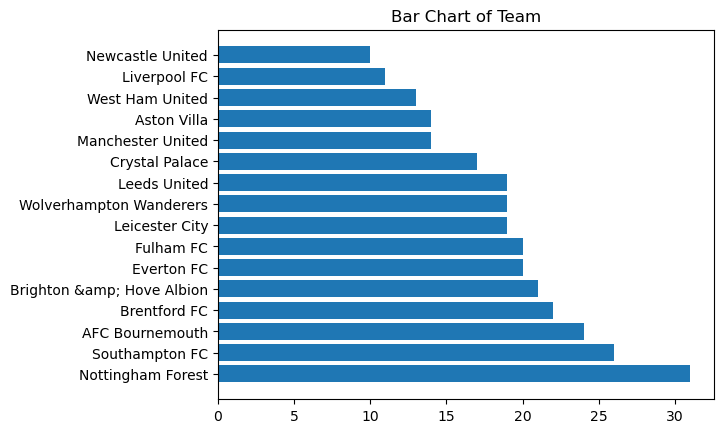

In [27]:
# start with team
# plot a bar chart of team
plt.Figure(figsize=(15,10))
plt.barh(team_first_300['team'].value_counts().index, team_first_300['team'].value_counts())
plt.title('Bar Chart of Team')
plt.show()

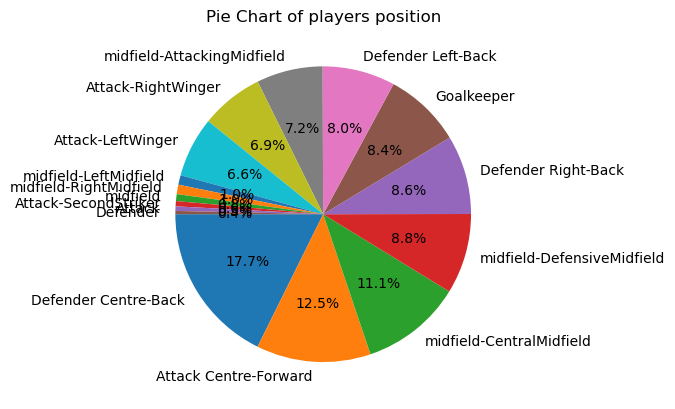

In [28]:
# pie chart of position
plt.Figure(figsize=(15,10))
# increase the size of the chart
plt.pie(df['position'].value_counts(), labels=df['position'].value_counts().index, autopct='%1.1f%%',startangle=180,labeldistance=1.1)
plt.title('Pie Chart of players position')
plt.show()

In [29]:
df['position'].value_counts().sort_values(ascending=False)

position
Defender Centre-Back          1646
Attack Centre-Forward         1164
midfield-CentralMidfield      1030
midfield-DefensiveMidfield     817
Defender Right-Back            805
Goalkeeper                     786
Defender Left-Back             741
midfield-AttackingMidfield     674
Attack-RightWinger             639
Attack-LeftWinger              613
midfield-LeftMidfield           97
midfield-RightMidfield          96
midfield                        70
Attack-SecondStriker            53
Attack                          46
Defender                        33
Name: count, dtype: int64

In [30]:
# we will drop posistion that is less than 2% of total
# df = df.drop(df[df['minutes played']== minimum_minutes].index, axis=0)
index = df[(df['position']=='Defender')| (df['position']=='Attack') | (df['position']=='midfield')| (df['position']=='Attack-SecondStriker') | (df['position']=='midfield-RightMidfield') | (df['position']=='midfield-LeftMidfield')].index
df = df.drop(index,axis=0)

## 4. Bivariate/Multivariate Analysis:

**categorical & numerical**

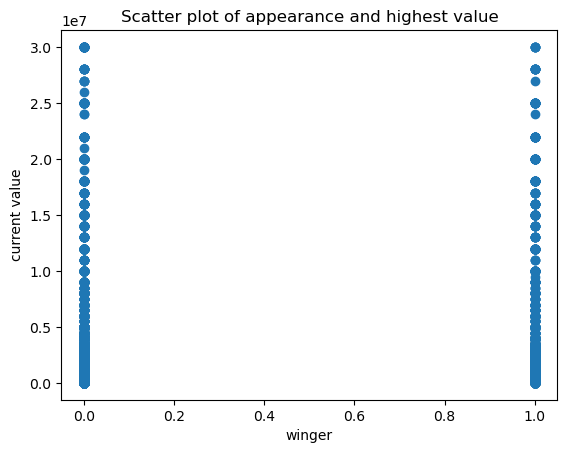

In [31]:
# relationship between winger and current_value using scatter plot
plt.Figure(figsize=(15,10))
plt.scatter(df['winger'],df['current_value'])
plt.title('Scatter plot of appearance and highest value')
plt.xlabel('winger')
plt.ylabel('current value')
plt.show()

In [32]:
# there is no effect wheather the player is winger or not, therefore drop the winger column
df = df.drop(['winger'],axis=1)

**numerical & numerical**

In [33]:
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance             float64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played         float64
days_injured           float64
games_injured          float64
award                  float64
current_value          float64
highest_value          float64
position_encoded       float64
dtype: object

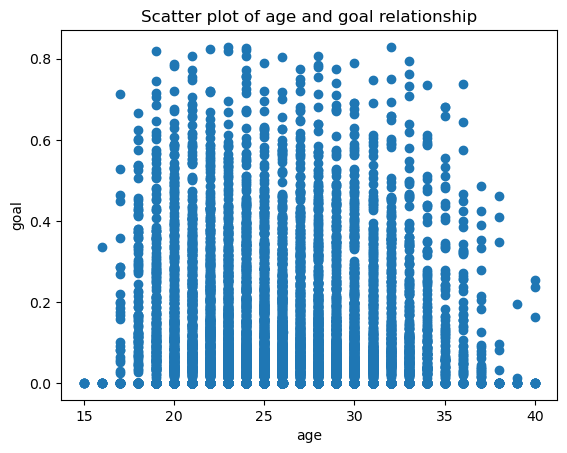

In [34]:
# show line chart of highest value and goal relationship
plt.Figure(figsize=(15,10))
plt.scatter(df['age'],df['goals'])
plt.title('Scatter plot of age and goal relationship')
plt.xlabel('age')
plt.ylabel('goal')
plt.show()

In [35]:
# age between 17 and 37 scores more goals

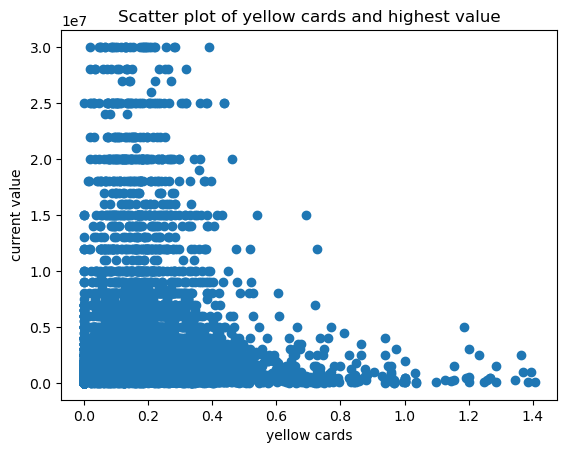

In [36]:
# relationship between yellow card and current_value using scatter plot
plt.Figure(figsize=(15,10))
plt.scatter(df['yellow cards'],df['current_value'])
plt.title('Scatter plot of yellow cards and highest value')
plt.xlabel('yellow cards')
plt.ylabel('current value')
plt.show()

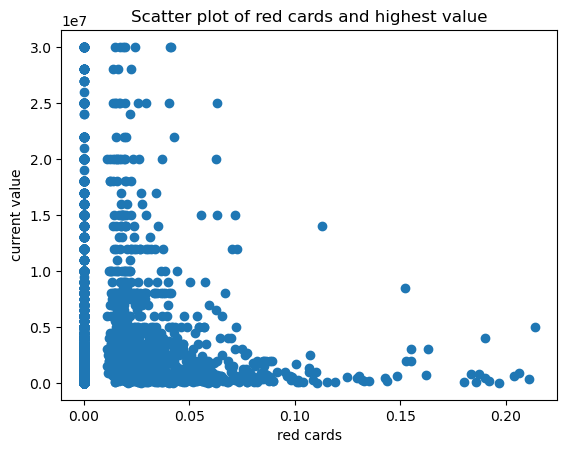

In [37]:
# relationship between red card and current_value using scatter plot
plt.Figure(figsize=(15,10))
plt.scatter(df['red cards'],df['current_value'])
plt.title('Scatter plot of red cards and highest value')
plt.xlabel('red cards')
plt.ylabel('current value')
plt.show()

In [38]:
# the minimum value of red cards and yellow cards in life of player, the highest value of his price will be

# Linear regression part

In [39]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## 1. Feature engineering
Feature scaling

One hot encoding

In [40]:
df.dtypes

team                    object
position                object
height                 float64
age                    float64
appearance             float64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played         float64
days_injured           float64
games_injured          float64
award                  float64
current_value          float64
highest_value          float64
position_encoded       float64
dtype: object

In [43]:
# encode object columns
df = pd.get_dummies(df, columns=['team', 'position'])

In [42]:
df.shape

(8915, 19)

In [399]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,name_Óscar Romero,name_Óscar Trejo,name_Óscar Valentín,name_Óscar Villa,name_Óscar de Marcos,name_Ömer Ali Sahiner,name_Ömer Beyaz,name_Ömer Toprak,name_Úmaro Embaló,name_Ümit Akdag
1,196.0,30.0,15.0,0.0,0.000000,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,False,False,False,False,False,False,False
6,187.0,28.0,70.0,0.0,0.032901,0.115153,0.0,0.0,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,False


## 2. Feature selection

In [44]:
# since current_value is the target, show correlation
correlation = df.corr()
correlation['current_value'].sort_values(ascending=False)

current_value              1.000000
highest_value              0.814555
appearance                 0.446129
minutes played             0.432305
assists                    0.201211
                             ...   
team_Marumo Gallants FC   -0.034638
goals conceded            -0.043215
clean sheets              -0.051233
age                       -0.080742
position_Goalkeeper       -0.082784
Name: current_value, Length: 401, dtype: float64

In [45]:
# Set the correlation threshold
threshold = 0.15  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value'],
      dtype='object')

In [46]:
selected_features = ['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value']

In [47]:
df = df[selected_features]
df.head()

,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value
1,15.0,0.000000,0.000000,1304.0,510.0,58.0,1.0,1500000.0,22000000.0
6,70.0,0.000000,0.032901,5471.0,95.0,19.0,10.0,15000000.0,35000000.0
8,34.0,0.000000,0.000000,2758.0,47.0,13.0,0.0,2000000.0,2000000.0
10,89.0,0.012619,0.063096,7132.0,182.0,15.0,3.0,22000000.0,22000000.0
11,34.0,0.000000,0.033507,2686.0,175.0,28.0,1.0,10000000.0,12000000.0


## 3. Prepare train and test data

In [48]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
X.shape

(8915, 8)

## Buliding the Model

In [50]:
model = LinearRegression()

## Train the Model

In [51]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model 

In [52]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

### Interpretation of the Model

In [53]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,-5.853176e+05
goals,1.649236e+05
assists,1.834386e+05
minutes played,1.114952e+06
days_injured,3.155228e+05
games_injured,-7.923107e+05
award,-4.033194e+05
highest_value,3.847739e+06


In [54]:
print(model.intercept_) 

2642291.7835109364


## Evaluating the Model

#### Mean Square Error

In [55]:
y_base = [y_train.mean()] * len(y_test)

In [56]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 23031879499898.105


In [57]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 6563367588110.108
Mean Squared Error for testing: 6423288669520.149


#### Predictions vs. Real Values

In [60]:
predictions = model.predict(X_test_scaled)
predictions

array([ 815403.13590673, 1923791.47454228, 1500917.0515631 , ...,
       1787556.93930654, -675485.51287948,  251404.9316648 ])

In [61]:
Real_Values = np.array(y_test)
Real_Values

array([ 200000.,  700000., 1500000., ..., 1300000.,  150000.,   25000.])

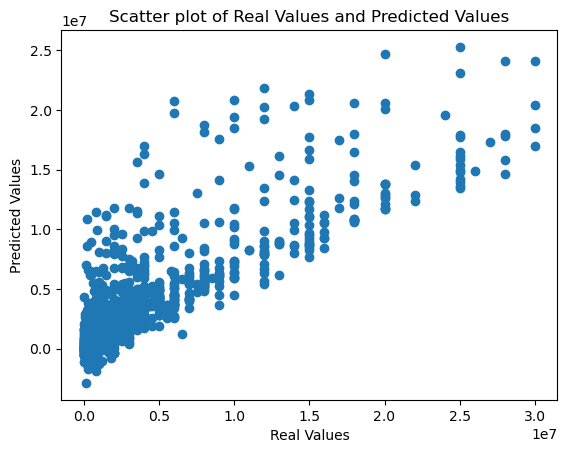

In [73]:
plt.Figure(figsize=(15,10))
plt.scatter(Real_Values,predictions); 
plt.title('Scatter plot of Real Values and Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

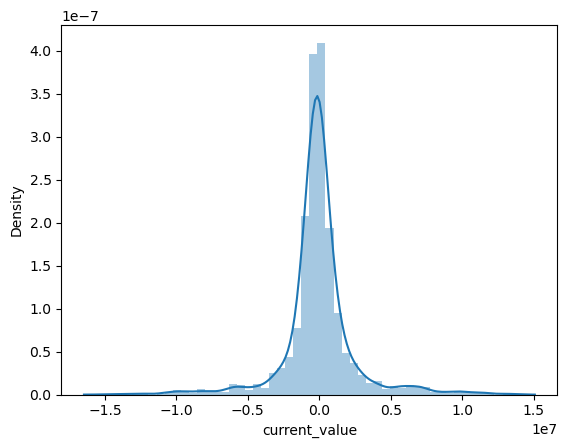

In [66]:
# plot histogram
plt.Figure(figsize=(15,10))
sns.distplot((y_test-predictions),bins=50);
plt.show()

In [72]:
# show accuracy of model
accuracy = r2_score(y_test, y_pred)
print(f'Accuracy of the model: {round(accuracy,2)*100}%')

Accuracy of the model: 72.0%
